# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [61]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Urban          0
US             0
dtype: int64

### ① Sales (Target) 

In [116]:
var = 'Sales'
data[['Sales']].head()

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15


1) 변수의 비즈니스 의미

> 각 지역 판매량 (1000개 단위)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [10]:
data[var].isna().sum()

0

> NaN 존재하지 않음

4) 가변수화 필요 여부

> 없음

5) 기초통계량(수치화)

In [11]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

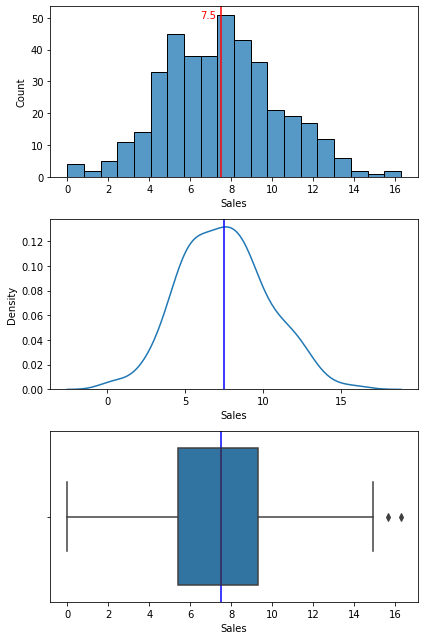

In [117]:
plt.figure(figsize=(6,9))

plt.subplot(3,1,1)
sns.histplot(x=var, data=data, bins=20)
plt.axvline(data[var].mean(), color='r')
plt.text(data[var].mean()-1, 50, round(data[var].mean(),2), c='r')

plt.subplot(3,1,2)
sns.kdeplot(x=var, data=data)
plt.axvline(data[var].mean(), color='b')

plt.subplot(3,1,3)
sns.boxplot(x=var, data=data)
plt.axvline(data[var].mean(), color='b')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 5000 ~ 9000개 정도의 판매량이 대부분이다. 

8) 추가 분석해 볼 사항이 있나요?

> ( 4000개 이하 / 4000개~10000개 / 10000개 초과 )단위로 지역별 특징을 분석해보면 좋을 것 같다.  
>
> * ~4000개 : 판매량 저조  
> * 4000개~10000개 : 판매량 평이  
> * 10000개~ : 판매량 고조  

### ② CompPrice

In [135]:
var = 'CompPrice'
data[['CompPrice']].head()

,CompPrice
0,138
1,111
2,113
3,117
4,141


1) 변수의 비즈니스 의미

> 경쟁사 가격 (달러 단위)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [51]:
data[var].isna().sum()

0

> NaN 존재하지 않음

4) 가변수화 필요 여부

> 없음

5) 기초통계량(수치화)

In [53]:
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

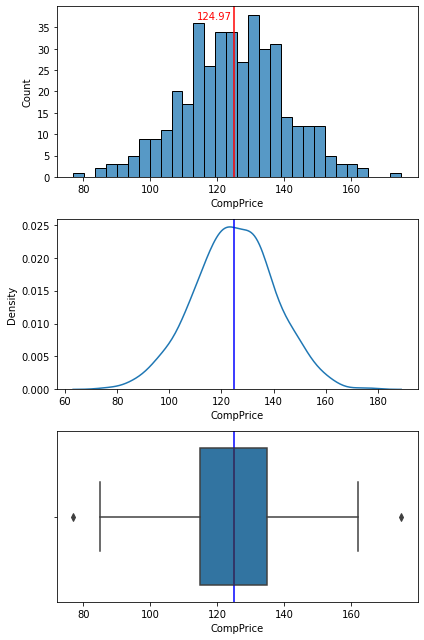

In [137]:
plt.figure(figsize=(6,9))

plt.subplot(3,1,1)
sns.histplot(x=var, data=data, bins=30)
plt.axvline(data[var].mean(), color='r')
plt.text(data[var].mean()-11, 37, round(data[var].mean(),2), c='r')

plt.subplot(3,1,2)
sns.kdeplot(x=var, data=data)
plt.axvline(data[var].mean(), color='b')

plt.subplot(3,1,3)
sns.boxplot(x=var, data=data)
plt.axvline(data[var].mean(), color='b')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 경쟁사의 가격은 115 ~ 135 달러가 대부분이다.

8) 추가 분석해 볼 사항이 있나요?

> ( 115 이하 / 115~135 / 135 초과 )단위로 지역별 특징을 분석하여  
> 경쟁사의 가격 책정 특징을 파악해보면 좋을 것 같다.  
>
> * ~115 : 가격 저조  
> * 115~135 : 가격 평이  
> * 135~ : 가격 고조  

### ③ Income

In [138]:
var = 'Income'
data[['Income']].head()

,Income
0,73
1,48
2,35
3,100
4,64


1) 변수의 비즈니스 의미

> 지역 평균 소득 (달러 단위)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [60]:
data[var].isna().sum()

0

> NaN 존재하지 않음

4) 가변수화 필요 여부

> 없음

5) 기초통계량(수치화)

In [62]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

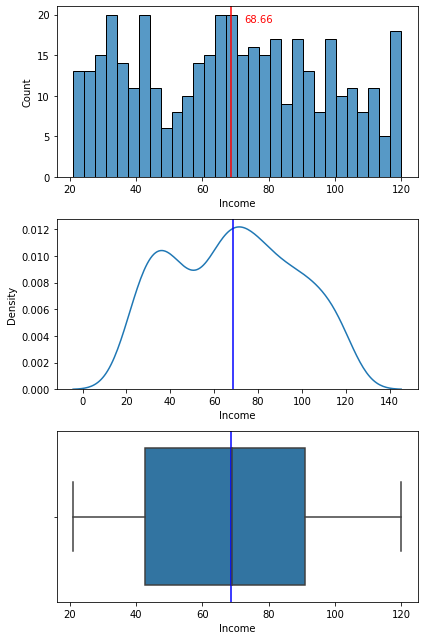

In [141]:
plt.figure(figsize=(6,9))

plt.subplot(3,1,1)
sns.histplot(x=var, data=data, bins=30)
plt.axvline(data[var].mean(), color='r')
plt.text(data[var].mean()+4, 19, round(data[var].mean(),2), c='r')

plt.subplot(3,1,2)
sns.kdeplot(x=var, data=data)
plt.axvline(data[var].mean(), color='b')

plt.subplot(3,1,3)
sns.boxplot(x=var, data=data)
plt.axvline(data[var].mean(), color='b')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 21000 ~ 120000 달러인 것을 보아 지역별 연 평균 소득액으로 추정된다.  

8) 추가 분석해 볼 사항이 있나요?

> 지역 별 소득과 판매량의 관계,  
> 지역 별 소득과 경쟁사 가격 책정 관계,  
> 지역 별 소득과 회사의 판매 가격 책정 관계,  
> 지역 별 소득과 회사의 광고 예산액과의 관계 를 분석해볼만 하다.


### ④ Advertising

In [142]:
var = 'Advertising'
data[['Advertising']].head()

,Advertising
0,11
1,16
2,10
3,4
4,3


1) 변수의 비즈니스 의미

> 각 지역, 회사의 광고 예산 (1000달러 단위)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [67]:
data[var].isna().sum()

0

> NaN 존재하지 않음

4) 가변수화 필요 여부

> 없음

5) 기초통계량(수치화)

In [68]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

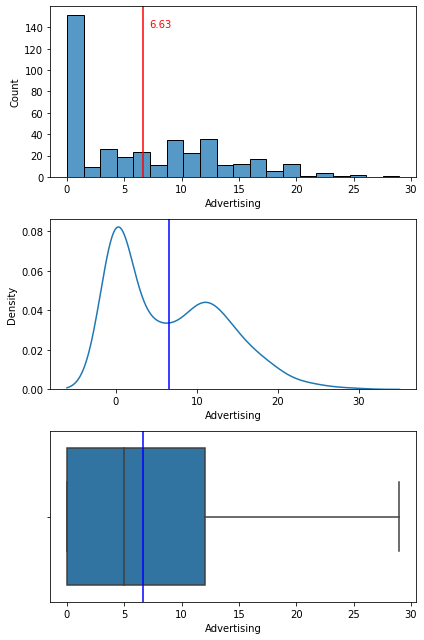

In [144]:
plt.figure(figsize=(6,9))

plt.subplot(3,1,1)
sns.histplot(x=var, data=data, bins=20)
plt.axvline(data[var].mean(), color='r')
plt.text(data[var].mean()+0.5, 140, round(data[var].mean(),2), c='r')

plt.subplot(3,1,2)
sns.kdeplot(x=var, data=data)
plt.axvline(data[var].mean(), color='b')

plt.subplot(3,1,3)
sns.boxplot(x=var, data=data)
plt.axvline(data[var].mean(), color='b')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 광고 예산액이 대부분 1000달러 안밖으로 분포가 좌로 치우쳐져 있다.  
> 회사에서 광고 예산을 적극적으로 책정하지 않는 것 같아 보인다.

8) 추가 분석해 볼 사항이 있나요?

> ( 5000 이하 / 5000~12000 / 12000 초과 )단위로 지역별 특징을 분석하고,  
> 광고 예산 책정의 근거가 확실한가를 파악해보면 좋을 것 같다.  

### ⑤ Population

In [145]:
var = 'Population'
data[['Population']].head()

,Population
0,276
1,260
2,269
3,466
4,340


1) 변수의 비즈니스 의미

> 지역 인구수 (1000명 단위)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [74]:
data[var].isna().sum()

0

> NaN 존재하지 않음

4) 가변수화 필요 여부

> 없음

5) 기초통계량(수치화)

In [75]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

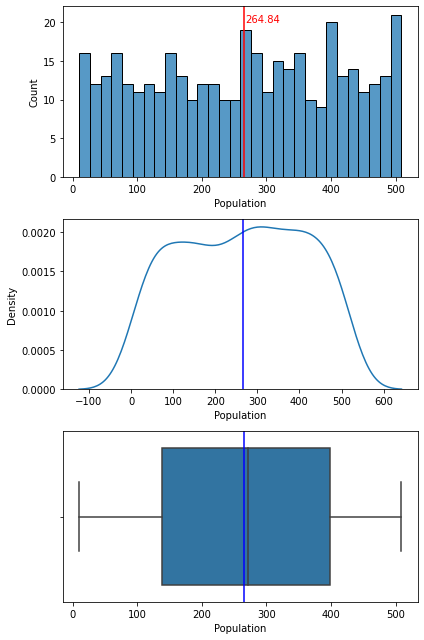

In [151]:
plt.figure(figsize=(6,9))

plt.subplot(3,1,1)
sns.histplot(x=var, data=data, bins=30)
plt.axvline(data[var].mean(), color='r')
plt.text(data[var].mean()+2, 20, round(data[var].mean(),2), c='r')

plt.subplot(3,1,2)
sns.kdeplot(x=var, data=data)
plt.axvline(data[var].mean(), color='b')

plt.subplot(3,1,3)
sns.boxplot(x=var, data=data)
plt.axvline(data[var].mean(), color='b')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 지역별 인구 수가 거의 균등하다. (인구 수 정책이 존재하나??)

8) 추가 분석해 볼 사항이 있나요?

> 지역별 인구 수와 지역별 인구 평균 연령에 따른 회사의 광고 예산액을 분석해보면 좋을 것 같다.

### ⑥ Price

In [152]:
var = 'Price'
data[['Price']].head()

,Price
0,120
1,83
2,80
3,97
4,128


1) 변수의 비즈니스 의미

> 지사 지역별 판매가격 (달러 단위)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [81]:
data[var].isna().sum()

0

> NaN 존재하지 않음

4) 가변수화 필요 여부

> 없음

5) 기초통계량(수치화)

In [82]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

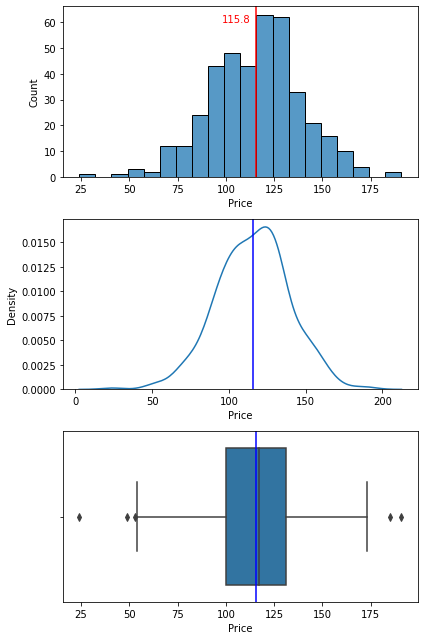

In [154]:
plt.figure(figsize=(6,9))

plt.subplot(3,1,1)
sns.histplot(x=var, data=data, bins=20)
plt.axvline(data[var].mean(), color='r')
plt.text(data[var].mean()-18, 60, round(data[var].mean(),2), c='r')

plt.subplot(3,1,2)
sns.kdeplot(x=var, data=data)
plt.axvline(data[var].mean(), color='b')

plt.subplot(3,1,3)
sns.boxplot(x=var, data=data)
plt.axvline(data[var].mean(), color='b')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 가격이 100 ~ 131 달러인 것이 대부분이다.  

8) 추가 분석해 볼 사항이 있나요?

> ( 115 이하 / 115~135 / 135 초과 )단위로 지역별 특징을 분석하여,  
> 가격 책정의 근거를 파악해보면 좋을 것 같다.  
>
> * ~115 : 저렴  
> * 115~135 : 가격 평이  
> * 135~ : 고가  
>
> 또한, 경쟁사의 판매 가격과 비교해보고, 각 회사의 가격 책정 근거의 차이를 파악해보면 좋을 것 같다.

### ⑦ ShelveLoc

In [88]:
var = 'ShelveLoc'
data[['ShelveLoc']].head()

,ShelveLoc
0,Bad
1,Good
2,Medium
3,Medium
4,Bad


1) 변수의 비즈니스 의미

> 진열 상태

2) 숫자, 범주?

> 범주

3) NaN 존재 유무 및 조치방안

In [89]:
data[var].isna().sum()

0

> NaN 존재하지 않음

4) 가변수화 필요 여부

> 필요 => 0,1 로

5) 기초통계량(수치화)

In [91]:
data[var].value_counts() / len(data[var])

Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64

6) 분포 확인(시각화)

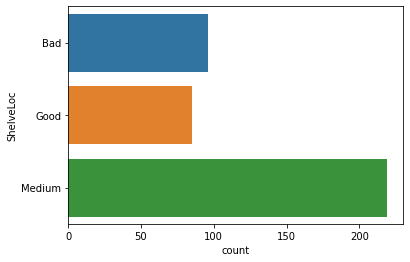

In [97]:
sns.countplot(y=var, data=data)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> Bad 상태가 24%로 높은 비율로 존재한다.  
> Bad 상태의 원인을 파악하고 해결안을 찾아야 할 것 같다.

8) 추가 분석해 볼 사항이 있나요?

> 진열 상태와 판매량과의 관계 를 분석하고,  
>
> 진열 상태와 지역별 인구 수,  
> 진열 상태와 지역별 인구의 평균연령,  
> 진열 상태와 지역별 도심 지역 여부,  
> 진열 상태와 미국에 위치한 여부 를 분석하여 진열 상태의 원인을 찾아보면 좋을 것 같다.

### ⑧ Age

In [155]:
var = 'Age'
data[['Age']].head()

,Age
0,42
1,65
2,59
3,55
4,38


1) 변수의 비즈니스 의미

> 지역 인구의 평균 연령

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [99]:
data[var].isna().sum()

0

> NaN 존재하지 않음

4) 가변수화 필요 여부

> 없음

5) 기초통계량(수치화)

In [100]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

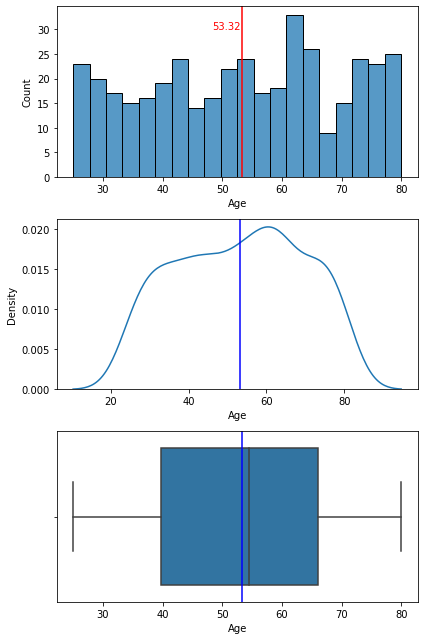

In [157]:
plt.figure(figsize=(6,9))

plt.subplot(3,1,1)
sns.histplot(x=var, data=data, bins=20)
plt.axvline(data[var].mean(), color='r')
plt.text(data[var].mean()-5, 30, round(data[var].mean(),2), c='r')

plt.subplot(3,1,2)
sns.kdeplot(x=var, data=data)
plt.axvline(data[var].mean(), color='b')

plt.subplot(3,1,3)
sns.boxplot(x=var, data=data)
plt.axvline(data[var].mean(), color='b')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 지역별 평균연령의 분포가 균등하다.  
> 카시트가 필요한 연령은 영유아를 자녀로 두고 있는 30-40대 연령이므로,  
> 평균연령이 20-30대?? 인 지역을 찾고, 해당 지역에서의 지역 특징과 회사의 정책 특징을 분석하여  
판매량을 더 늘릴 수 있는 방법을 탐색해야한다. 

8) 추가 분석해 볼 사항이 있나요?

> 영유아를 자녀로 두고 있는 30-40대가 주축이 되는 지역일 때의 평균연령은 몇 정도로 나올 것인가 생각해봐야한다.

### ⑨ Urban

In [107]:
var = 'Urban'
data[['Urban']].head()

,Urban
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes


1) 변수의 비즈니스 의미

> 도심 지역 여부

2) 숫자, 범주?

> 범주

3) NaN 존재 유무 및 조치방안

In [108]:
data[var].isna().sum()

0

> NaN 존재하지 않음

4) 가변수화 필요 여부

> 필요

5) 기초통계량(수치화)

In [109]:
data[var].value_counts() / len(data[var])

Yes    0.705
No     0.295
Name: Urban, dtype: float64

6) 분포 확인(시각화)

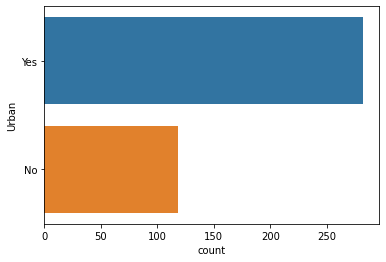

In [110]:
sns.countplot(y=var, data=data)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> Yes가 70%로, 주로 도심에 위치하고 있다.  

8) 추가 분석해 볼 사항이 있나요?

> 도심 지역에 따른 매장 특징과 판매량과의 관계를 파악해야 한다.

### ⑩ US

In [111]:
var = 'US'
data[['US']].head()

,US
0,Yes
1,Yes
2,Yes
3,Yes
4,No


1) 변수의 비즈니스 의미

> 매장이 미국에 존재하는지 여부

2) 숫자, 범주?

> 범주

3) NaN 존재 유무 및 조치방안

In [112]:
data[var].isna().sum()

0

> NaN 존재하지 않음

4) 가변수화 필요 여부

> 필요 => 0,1 로

5) 기초통계량(수치화)

In [113]:
data[var].value_counts() / len(data[var])

Yes    0.645
No     0.355
Name: US, dtype: float64

6) 분포 확인(시각화)

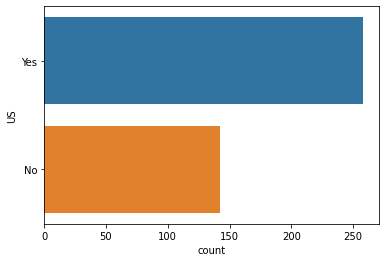

In [115]:
sns.countplot(y=var, data=data)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> Yes가 65%로, 주로 US에 위치하고 있다.

8) 추가 분석해 볼 사항이 있나요?

> US 위치 여부에 따른 매장 특징과 판매량과의 관계를 파악해야 한다.